In [1]:
# in this project i use the single-layer ANN to classificate the genotype, treatment type, behavior by set of proteins
# i use this dataset: Mice Protein Expression
# https://www.kaggle.com/ruslankl/mice-protein-expression

# at first we need to load & preprocessing data
import numpy as np
import pandas as pd

def load(path):
    """load data from file"""
    class dataStruct:
        x: None
        y: None
    
    data = dataStruct()
    
    data.x = pd.read_csv(path)
    data.y = pd.read_csv(path, usecols=[81])
    
    return data

def preprocessing(data):
    """data preprocessing"""
    # delete columns: 1: Mouse ID, 79: Genotype, 80: Treatment type, 81: Behavior
    data.x.drop(data.x.columns[[0, 78, 79, 80, 81]], axis=1, inplace=True)
    
    # fill cells with the Nan value by zeros
    data.x.fillna(0, inplace=True)
    
    # change the type of classes: 0: c-CS-s, 1: c-CS-m, 2: c-SC-s, 3: c-SC-m, 4: t-CS-s, 5: t-CS-m, 6: t-SC-s,
    # 7: t-SC-m
    for i in range(0, data.y.size):
        data.y.at[i, 'class'] = {'c-CS-s': 0, 'c-CS-m': 1, 'c-SC-s': 2, 'c-SC-m': 3, 't-CS-s': 4, \
                                 't-CS-m': 5, 't-SC-s': 6, 't-SC-m': 7}[data.y.at[i, 'class']]
    
    return data

def show(data, type=0):
    """data display"""
    from IPython.display import display
    
    if type == 1:
        with pd.option_context("display.max_rows", None, "display.max_columns", None):
            display(data.x, data.y)
    else:
        display(data.x, data.y)

data = load('Data_Cortex_Nuclear.csv')
data = preprocessing(data)
show(data)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,0.000000,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,0.000000,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,0.000000,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,0.000000,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,0.000000,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730
5,0.447506,0.628176,0.367388,2.385939,4.807635,0.218578,0.176233,2.141282,0.195188,1.442398,...,0.190469,0.131575,0.000000,0.106476,0.109446,0.439833,0.116657,0.140766,0.142180,1.816389
6,0.428033,0.573696,0.342709,2.334224,4.473130,0.225173,0.184004,2.012414,0.195789,1.612036,...,0.181610,0.141806,0.000000,0.097834,0.111483,0.406293,0.137229,0.156682,0.157499,1.528484
7,0.416923,0.564036,0.327703,2.260135,4.268735,0.214834,0.179668,2.007985,0.189803,1.424601,...,0.191561,0.141013,0.000000,0.099494,0.113080,0.382532,0.123376,0.155612,0.159409,1.652658
8,0.386311,0.538428,0.317720,2.125725,4.063950,0.207222,0.167778,1.861514,0.180684,1.261891,...,0.186378,0.139589,0.000000,0.105145,0.105490,0.435687,0.125173,0.152711,0.158235,1.834599
9,0.380827,0.499294,0.362462,2.096266,3.598587,0.227649,0.188093,1.717861,0.188093,1.414329,...,0.189523,0.183678,0.000000,0.093300,0.116906,0.414793,0.146133,0.188849,0.192334,1.516862


,class
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


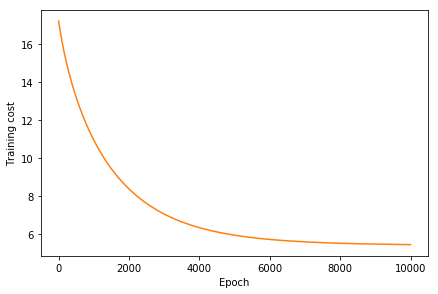

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf

# single-layer ANN
class LinReg:
    """model: linear regression, minimization method: OLS, cost function: MSE, optimization method: GD"""
    def __init__(self, x_dim, learning_rate=0.001, random_seed=None):
        self.x_dim = x_dim
        self.learning_rate = learning_rate
        self.g = tf.Graph()
        
        with self.g.as_default():
            # if it is nessasary to generate the same random numbers
            # tf.set_random_seed(random_seed)
            
            self.build()
            
            # initialize all trainable variables, before training starts
            self.init_op = tf.global_variables_initializer()
    
    def build(self):
        self.x = tf.placeholder(dtype=tf.float32, shape=(None, 77), name = 'input_x')
        self.y = tf.placeholder(dtype=tf.float32, shape=(None, 1), name = 'input_y')
        
        # zeros - create a tensor with all elements set to zero
        w = tf.Variable(tf.zeros(shape=(77)), name='weight')
        b = tf.Variable(tf.zeros(shape=(77)), name='bias')
        
        # squeeze - removes dimensions of size 1 from the shape of a tensor
        self.z = tf.squeeze(w*self.x + b, name='z')
        
        sqr_errors = tf.square(self.y - self.z, name='sqr_errors')
        
        # reduce_mean - computes the mean of elements across dimensions of a tensor
        self.mean_cost = tf.reduce_mean(sqr_errors, name='mean_cost')
        
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=self.learning_rate, name='GradientDescent')
        self.optimizer = optimizer.minimize(self.mean_cost)

def train_linreg(sess, model, x_train, y_train, num_epochs=10):
    # initialize variables
    sess.run(model.init_op)
    
    training_costs =[]
    
    for i in range(num_epochs):
        cost = sess.run([model.optimizer, model.mean_cost], feed_dict={model.x:x_train, model.y:y_train})
        training_costs.append(cost)
    
    return training_costs

lrModel = LinReg(x_dim=data.x.shape[1], learning_rate=0.01)

sess = tf.Session(graph=lrModel.g)
training_costs = train_linreg(sess, lrModel, data.x, data.y, num_epochs=10000)


import matplotlib.pyplot as plt
plt.plot(range(1, len(training_costs) + 1), training_costs)
plt.tight_layout()
plt.xlabel('Epoch')
plt.ylabel('Training cost')
plt.show()